## Feature Engineering 



In [2]:
import pandas as pd 

df = pd.read_csv('../data/data.csv')
df.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [3]:
# Nueva feature: diferencia de goles (local - visitante)
df['goal_difference'] = df['goles_local'] - df['goles_visitante']

# Ver resultados
print(df[['goles_local', 'goles_visitante', 'goal_difference']].head())

   goles_local  goles_visitante  goal_difference
0            2                0                2
1            1                5               -4
2            1                0                1
3            2                3               -1
4            5                3                2


In [4]:
# Nueva feature: ratio tiros al arco por porcentaje de posesión (local)
df['ratio_tiros_posesion_local'] = df['tiros_arco_local'] / df['posesion_local (%)']

# Ver resultados
print(df[['tiros_arco_local', 'posesion_local (%)', 'ratio_tiros_posesion_local']].head())

   tiros_arco_local  posesion_local (%)  ratio_tiros_posesion_local
0                12                  54                    0.222222
1                12                  60                    0.200000
2                10                  55                    0.181818
3                 3                  57                    0.052632
4                 7                  52                    0.134615


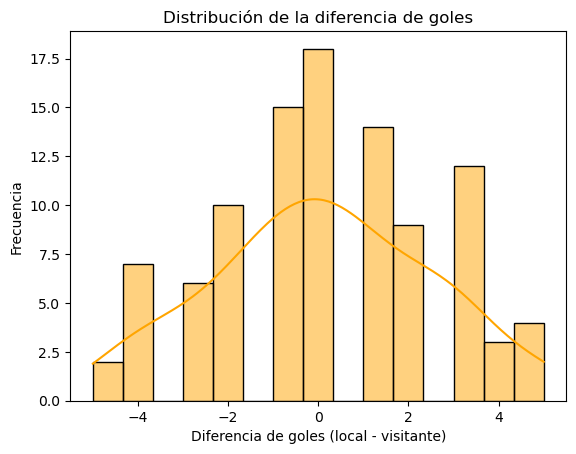

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de diferencia de goles
sns.histplot(df['goal_difference'], bins=15, kde=True, color='orange')
plt.title('Distribución de la diferencia de goles')
plt.xlabel('Diferencia de goles (local - visitante)')
plt.ylabel('Frecuencia')
plt.show()

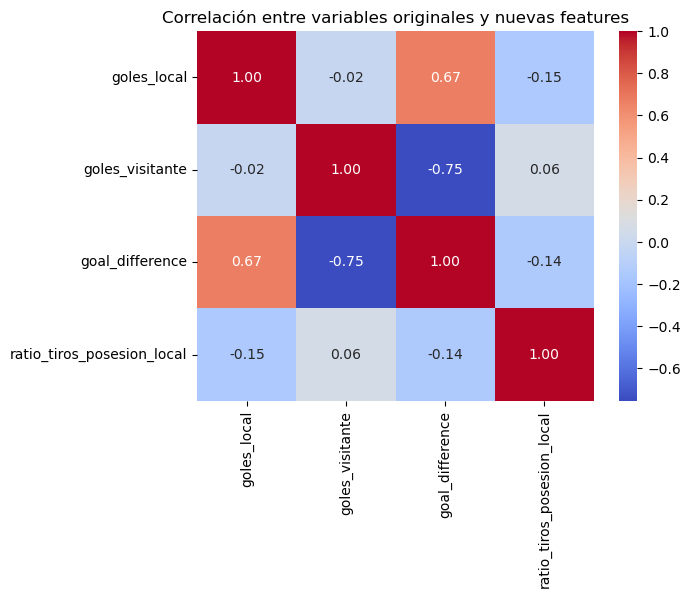

In [12]:
# Análisis de correlación
corr_vars = ['goles_local', 'goles_visitante', 'goal_difference', 'ratio_tiros_posesion_local']
corr_matrix = df[corr_vars].corr()

# Mapa de calor de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables originales y nuevas features')
plt.show()
